In [1]:
# standard
import pandas as pd
import numpy as np
import random
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



# FILL IN CODE HERE #
TEST_IMAGE_PATH = 'Dataset/test' # replace with your path
TRAIN_IMAGE_PATH = 'Dataset/train'

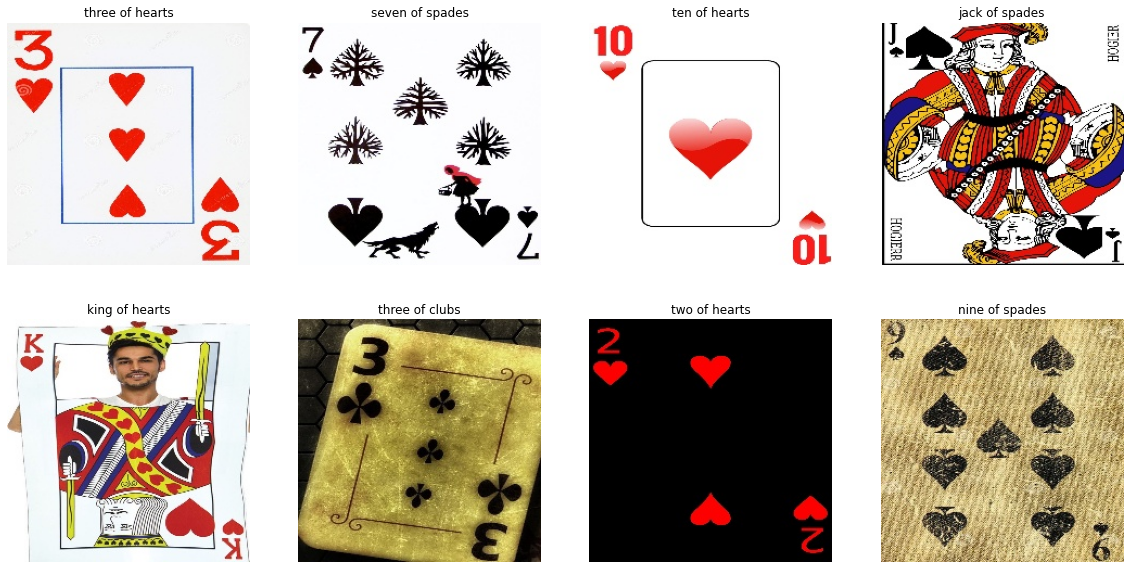

In [2]:
# read image
test_images = []
test_labels = []

for label in os.listdir(TEST_IMAGE_PATH):
    label_path = os.path.join(TEST_IMAGE_PATH, label)
    if os.path.isdir(label_path):
        for img_file in os.listdir(label_path):
            img_path = os.path.join(label_path, img_file)
            img = cv2.imread(img_path)
            test_images.append(img)
            test_labels.append(label)

train_images = []
train_labels = []

for label in os.listdir(TRAIN_IMAGE_PATH):
    label_path = os.path.join(TRAIN_IMAGE_PATH, label)
    if os.path.isdir(label_path):
        for img_file in os.listdir(label_path):
            img_path = os.path.join(label_path, img_file)
            img = cv2.imread(img_path)
            train_images.append(img)
            train_labels.append(label)

nrows, ncols = 2, 4  # Print the first 8 images
f, axs = plt.subplots(nrows, ncols, figsize=(20, 10))

for i in range(nrows):
    for j in range(ncols):
        indx = i * ncols + j
        axs[i, j].imshow(cv2.cvtColor(test_images[indx*31], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color representation
        axs[i, j].set_title(test_labels[indx*31])  # Set the subplot title as the image label
        axs[i, j].axis('off')  # Turn off axis labels

plt.show()


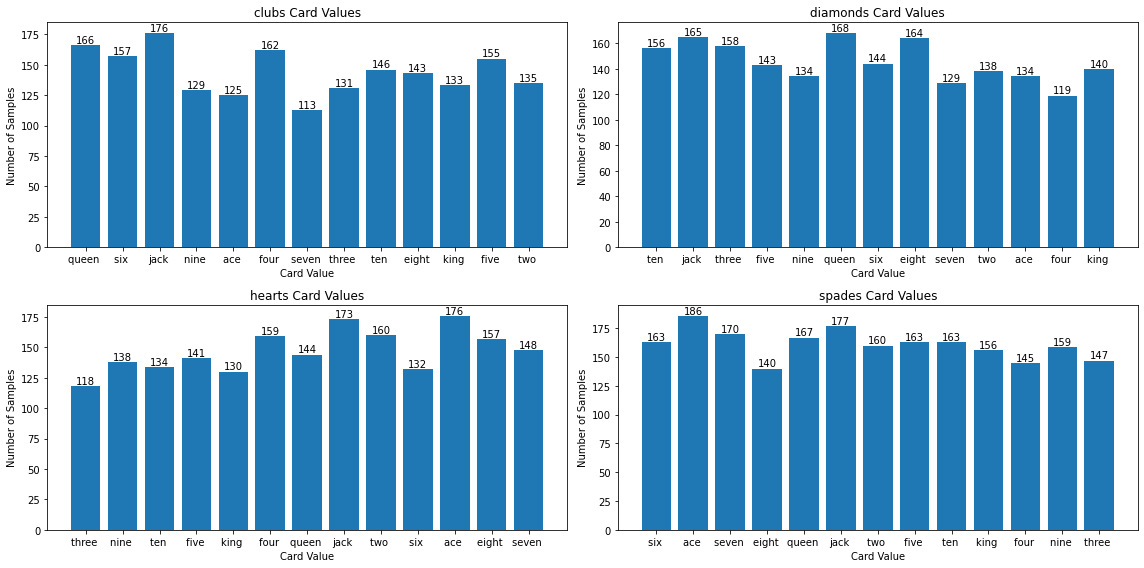

In [6]:
all_images = train_images + test_images
all_labels = train_labels + test_labels

# exclude jokers and extract card value and suit from labels
suits = []
values = []
for label in all_labels:
    if label.lower() != 'joker':
        value, suit = label.split('of ')  # Extract the value and suit
        suits.append(suit)
        values.append(value)

# EDA - Histogram of card values for each suit
suits_unique = set(suits)  # Get unique suits

fig, axs = plt.subplots(2, 2, figsize=(16, 8))

for idx, suit in enumerate(suits_unique):
    ax = axs[idx // 2][idx % 2]
    suit_values = [values[i] for i in range(len(suits)) if suits[i] == suit]

    # Count occurrences of each value
    value_counts = {}
    for value in suit_values:
        if value in value_counts:
            value_counts[value] += 1
        else:
            value_counts[value] = 1

    # Bar plot of value distribution
    ax.bar(value_counts.keys(), value_counts.values())
    ax.set_xlabel('Card Value')
    ax.set_ylabel('Number of Samples')
    ax.set_title(f'{suit} Card Values')

    # Add numbers to each bar
    for i, count in enumerate(value_counts.values()):
        ax.text(i, count, str(count), ha='center', va='bottom')



plt.tight_layout()
plt.show()

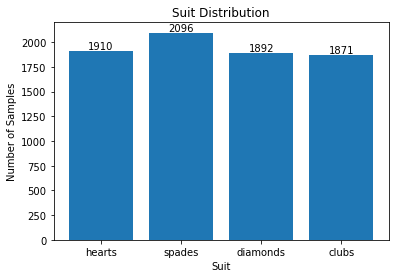

In [7]:
# Histogram of Suit
class_counts = {}
for suit in suits:
    if suit in class_counts:
        class_counts[suit] += 1
    else:
        class_counts[suit] = 1

# Bar plot of class distribution
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Suit')
plt.ylabel('Number of Samples')
plt.title('Suit Distribution')

# Add numbers to each bar
for i, count in enumerate(class_counts.values()):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [8]:
# Splitting into train and test sets (80% - 20% split per class)
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2, stratify=all_labels)

# Perform additional processing on the train and test data if needed
# ...